## Imports

In [36]:
import numpy as np
import pandas as pd
import scipy as sp
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import cv2
import random
from scipy.optimize import least_squares

## Singular Value Decomposition (SVD)

In [37]:
# Singular Value Decomposition (SVD) Module
class SVD:
    def __init__(self, A):
        self.A = A
    
    # Returns U, S and VT of SVD in Decreasing Order of Singular values (S).
    def apply_svd(self):
        """
            U: Left singular vectors
            S: Singular values (as a 1D array)
            VT: Right singular vectors (transposed)
        """
        U, S, VT = np.linalg.svd(self.A)
        return U, S, VT
    
    # Prints SVD Decomposition matrices U, S and VT.
    def print_svd(self):
        U, S, VT = self.apply_svd()
        print(f"U (Dimensions: {U.shape}):\n", U)
        print(f"S (Dimensions: {S.shape}):\n", S)
        print(f"VT (Dimensions: {VT.shape}):\n", VT)
    
    # Returns the ith left singular vector from the U matrix (1-based indexing).
    def get_left_singular_vector(self, ind=1):
        U, _, _ = self.apply_svd()
        if ind < 1 or ind > U.shape[1]:
            raise IndexError(f"Index {ind} is out of bounds for the left singular vectors. Valid range: 1 to {U.shape[1]}.")
        return U[:, ind - 1]
    
    # Returns the ith right singular vector from the VT matrix (1-based indexing).
    def get_right_singular_vector(self, ind=1):
        _, _, VT = self.apply_svd()
        if ind < 1 or ind > VT.shape[0]:
            raise IndexError(f"Index {ind} is out of bounds for the right singular vectors. Valid range: 1 to {VT.shape[0]}.")
        return VT[ind - 1, :]

### Testing SVD module

In [38]:
A = np.random.randint(1, 101, size=(12, 9))
print(A)

svd = SVD(A)
svd.print_svd()

left_vector = svd.get_left_singular_vector(1)
print(f"left vector: {left_vector}")

right_vector = svd.get_right_singular_vector(1)
print(f"right vector: {right_vector}")

[[ 27  91  23  75  91  32  95  65  49]
 [  9  76  68  94  61  78  65  23  12]
 [ 84  41  46  86   7  54   1  25  42]
 [ 42  68  55  51  84  26  49  16  16]
 [ 65  97  70  64  45   1  11  28  60]
 [ 99  78  85  37  87  75  23  26  48]
 [ 38  92  35  74   5  31  25  92  25]
 [ 27  32  21  33  86 100  11  41  67]
 [ 60  37  74  56  51  29  54  80   1]
 [ 79  78  50  61  44  38  91  63  70]
 [ 20  21  48  60   8  20  41   4  85]
 [ 40  61  40  49  44  60  94   8  96]]
U (Dimensions: (12, 12)):
 [[-0.34421439 -0.14649014  0.53179935 -0.09458376 -0.06303197  0.18317096
  -0.24676766 -0.06919112  0.46078753 -0.3264537  -0.25809364 -0.28210749]
 [-0.31084028 -0.09658732  0.19808133 -0.25832096  0.24056867 -0.74033599
   0.0332876   0.14973677 -0.20126734  0.23946474 -0.21549755 -0.11955064]
 [-0.24198041  0.27044188 -0.43768424  0.21051768  0.32956877 -0.17805324
   0.13996264  0.18885112  0.64647553 -0.0847428  -0.04659802  0.09780249]
 [-0.26105734 -0.02935756  0.07167318 -0.27944751 -0.3990

## Calculating 2D Homography Matrix (H : 3*3)

In [39]:
# Calculates Homography matrix using various methods
class HomographyMatrix:
    def __init__(self, A):
        _, cols = A.shape
        if cols != 9:
            raise ValueError("Expected number of columns is 9, but got {cols}")
        self.A = A
    
    # Returns Homography Matrix of size (3, 3) using Homography vector 
    def get_homography_matrix(self):
        pass
    
    # Prints Homography matrix
    def print_homography_matrix(self):
        pass

## Direct Linear Transformation (DLT) : SVD Based solution

In [40]:
class DirectLinearTransformation(HomographyMatrix):
    def __init__(self, A):
        super().__init__(A)

    # Returns Homography Vector, which is right singular vector of A corresponding to smallest Eigen value.
    def get_homography_vector(self):
        svd = SVD(self.A)
        _, cols = self.A.shape
        homography_vector = svd.get_right_singular_vector(cols)
        if len(homography_vector) != 9:
            raise ValueError(f"Expected length of 9, but got {len(homography_vector)}")
        return homography_vector

    # Returns Homography Matrix of size (3, 3) using Homography vector 
    def get_homography_matrix(self):
        homography_vector = self.get_homography_vector()
        homography_matrix = homography_vector.reshape(3, 3)
        return homography_matrix

    # Prints Homography vector
    def print_homography_vector(self):
        homography_vector = self.get_homography_vector()
        print(f"Homography vector (Dimensions: {homography_vector.shape}):\n", homography_vector)

    # Prints Homography matrix
    def print_homography_matrix(self):
        homography_matrix = self.get_homography_matrix()
        print(f"Homography matrix (Dimensions: {homography_matrix.shape}):\n", homography_matrix)

### Testing DLT

In [41]:
dlt = DirectLinearTransformation(A)
dlt.print_homography_matrix()

Homography matrix (Dimensions: (3, 3)):
 [[ 0.37806187 -0.26446582 -0.56806992]
 [ 0.54223784  0.3005821  -0.19869795]
 [-0.01283851 -0.17608329 -0.09695932]]


## Normalized DLT

In [42]:
class NormalizedDLT(HomographyMatrix):
    def __init__(self, A):
        super().__init__(A)

    # Returns Homography Vector, which is right singular vector of A corresponding to smallest Eigen value.
    def get_homography_vector(self):
        # Normalize A here
        svd = SVD(self.A)
        _, cols = self.A.shape
        homography_vector = svd.get_right_singular_vector(cols)
        if len(homography_vector) != 9:
            raise ValueError(f"Expected length of 9, but got {len(homography_vector)}")
        return homography_vector

    # Returns Homography Matrix of size (3, 3) using Homography vector 
    def get_homography_matrix(self):
        homography_vector = self.get_homography_vector()
        homography_matrix = homography_vector.reshape(3, 3)
        return homography_matrix

    # Prints Homography vector
    def print_homography_vector(self):
        homography_vector = self.get_homography_vector()
        print(f"Homography vector (Dimensions: {homography_vector.shape}):\n", homography_vector)

    # Prints Homography matrix
    def print_homography_matrix(self):
        homography_matrix = self.get_homography_matrix()
        print(f"Homography matrix (Dimensions: {homography_matrix.shape}):\n", homography_matrix)

## Symmetric Transfer Error

In [43]:
class SymmetricTransferError():
    def __init__(self, data):
        total_pairs = len(data)
        if total_pairs < 4:
            raise ValueError(f"Expected at least 4 pairs of matching points, but got {total_pairs}")
        self.data = data

    def euclidean_distance(self, pt1, pt2):
        return np.linalg.norm(pt1 - pt2)

    def calculate_symmetric_transfer_error(self, H):
        """Compute the symmetric transfer error for a given homography matrix H."""
        error = []
        H = H.reshape(3, 3)
        
        for (x1, y1), (x2, y2) in self.data:
            src_point = np.array([x1, y1, 1.0])
            dst_point = np.array([x2, y2, 1.0])

            # Project src_point to the destination image using H
            projected_dst_point = H @ src_point
            projected_dst_point /= projected_dst_point[2]  # Normalize

            # Project dst_point back to the source image using H^-1
            projected_src_point = np.linalg.inv(H) @ dst_point
            projected_src_point /= projected_src_point[2]  # Normalize

            # Symmetric transfer error components
            error.append(self.euclidean_distance(src_point[:2], projected_src_point[:2]))
            error.append(self.euclidean_distance(dst_point[:2], projected_dst_point[:2]))

        return error

    def get_homography_matrix(self):
        """Optimize the homography matrix H to minimize the symmetric transfer error."""
        # Initial estimate of H using cv2.findHomography
        pts_src = np.array([pt[0] for pt in self.data])
        pts_dst = np.array([pt[1] for pt in self.data])
        # H_initial, _ = cv2.findHomography(pts_src, pts_dst, method=0)
        H_initial = np.random.rand(3, 3)

        # print(H_initial)
        
        H_initial_flat = H_initial.flatten()

        # Use least_squares to minimize the symmetric transfer error
        result = least_squares(self.calculate_symmetric_transfer_error, H_initial_flat, method='lm')
        
        H_optimized = result.x.reshape(3, 3)
        return H_optimized
    
    # Prints Homography matrix
    def print_homography_matrix(self):
        homography_matrix = self.get_homography_matrix()
        print(f"Homography matrix (Dimensions: {homography_matrix.shape}):\n", homography_matrix)


### Testing Symmetric transfer error

In [44]:
matching_points_symm_trans = [
    ((100, 150), (140, 200)),
    ((120, 160), (160, 210)),
    ((130, 170), (170, 220)),
    ((140, 180), (180, 230)),
    ((150, 190), (190, 240)),
    ((160, 200), (200, 250)),
    ((170, 210), (210, 260)),
    ((180, 220), (220, 270)),
    ((190, 230), (230, 280)),
    ((200, 240), (240, 290))
]

symm_trans = SymmetricTransferError(matching_points_symm_trans)
symm_trans.print_homography_matrix()
homography_matrix_symm_trans = symm_trans.get_homography_matrix()

Homography matrix (Dimensions: (3, 3)):
 [[ 0.39694656  0.48922004  0.63733698]
 [ 0.46044259  0.17746399  0.7161633 ]
 [ 0.00624998 -0.00175248  0.03925415]]


## Re-projection Error

In [45]:
class ReProjectionError(HomographyMatrix):
    def __init__(self, A):
        super().__init__(A)

    # Returns Homography Matrix of size (3, 3) using Homography vector 
    def get_homography_matrix(self):
        pass

    # Prints Homography matrix
    def print_homography_matrix(self):
        pass

## Sampson Error

In [46]:
class SampsonError(HomographyMatrix):
    def __init__(self, A):
        super().__init__(A)

    # Returns Homography Matrix of size (3, 3) using Homography vector 
    def get_homography_matrix(self):
        pass

    # Prints Homography matrix
    def print_homography_matrix(self):
        pass

## RANSAC (Random Sample Consensus) for Homography Matrix

In [47]:
class RansacHomography:
    def __init__(self, data):
        total_pairs = len(data)
        if total_pairs < 4:
            raise ValueError(f"Expected at least 4 pairs of matching points, but got {total_pairs}")
        self.data = data

    def compute_threshold_percentile_distance(self, percentile=90):
        distances = []
        for (src_pt, dst_pt) in self.data:
            distance = np.linalg.norm(np.array(src_pt) - np.array(dst_pt))
            distances.append(distance)
        
        # Set threshold as the chosen percentile of the distances
        threshold = np.percentile(distances, percentile)
        return threshold

    # Returns Homography Matrix of size (3, 3)
    def get_ransac_homography_matrix(self, initial_p=0.99, s=4):
        """
        Perform Adaptive RANSAC to compute a robust homography matrix.
        
        Parameters:
        - correspondences data: List of point pairs [( (x1, y1), (x2, y2) ), ...]
        - threshold: Distance threshold to determine inliers.
        - initial_p: Desired probability of finding a valid solution.
        - s: Minimum number of points required to compute the model (4 for homography).
        
        Returns:
        - best_H: The homography matrix with the largest number of inliers.
        - best_inliers: The list of inliers corresponding to the best homography.
        """
        best_H = None
        best_inliers = []
        sample_count = 0
        N = float('inf')  # Start with N as infinity for adaptive stopping
        threshold = self.compute_threshold_percentile_distance()

        while sample_count < N:
            # Randomly sample 4 correspondences
            sample = random.sample(self.data, s)
            pts_src = np.float32([pt[0] for pt in sample])
            pts_dst = np.float32([pt[1] for pt in sample])

            # Compute homography
            H, _ = cv2.findHomography(pts_src, pts_dst, method=0)

            # Calculate distance for each correspondence and count inliers
            inliers = []
            for (src_pt, dst_pt) in self.data:
                src_pt_h = np.array([src_pt[0], src_pt[1], 1]).reshape(3, 1)
                dst_pt_estimated = H @ src_pt_h
                if dst_pt_estimated[2, 0] == 0:
                    dst_pt_estimated[2, 0] = 1e-10
                dst_pt_estimated /= dst_pt_estimated[2, 0]  # Normalize by z-coordinate
                
                distance = np.linalg.norm([dst_pt[0] - dst_pt_estimated[0, 0], dst_pt[1] - dst_pt_estimated[1, 0]])
                if distance < threshold:
                    inliers.append((src_pt, dst_pt))

            # Update best model if this one has more inliers
            if len(inliers) > len(best_inliers):
                best_H = H
                best_inliers = inliers

                # Update w (inlier ratio) and adaptively calculate N
                w = len(best_inliers) / len(self.data)
                if w > 0:
                    if 1 - w**s > 0:
                        denominator = np.log(1 - w**s)
                    else:
                        denominator = 1e6
                    N = max(1000, 1e18 * np.log(1 - initial_p) / denominator)

            # Increment sample count
            sample_count += 1

        # print(sample_count)
        return best_H, best_inliers

    # Prints Homography matrix
    def print_ransac_homography_matrix(self, initial_p=0.99, s=4):
        homography_matrix, _ = self.get_ransac_homography_matrix(initial_p, s)
        print(f"Homography matrix (Dimensions: {homography_matrix.shape}):\n", homography_matrix)

### Testing Ransac for Homography

In [48]:
matching_points = [
    ((100, 150), (140, 200)),
    ((120, 160), (160, 210)),
    ((130, 170), (170, 220)),
    ((140, 180), (180, 230)),
    ((150, 190), (190, 240)),
    ((160, 200), (200, 250)),
    ((170, 210), (210, 260)),
    ((180, 220), (220, 270)),
    ((190, 230), (230, 280)),
    ((200, 240), (240, 290))
]

ransac_test = RansacHomography(matching_points)
ransac_test.print_ransac_homography_matrix()

Homography matrix (Dimensions: (3, 3)):
 [[ 2.75543844e+00 -2.45761381e+00  1.10217537e+02]
 [ 3.51087687e+00 -3.21305224e+00  1.55326306e+02]
 [ 1.75543844e-02 -1.75543844e-02  1.00000000e+00]]


## Homography Estimation using Data

In [49]:
class HomographyEstimation:
    def __init__(self, data):
        """data contains pairs of matching points: 
        1. (x1, y1): matched 2D point in first image
        2. (x2, y2): matched 2D point in second image
        Note: 1. HX1 = X2
              2. data should have atleast 4 pairs of matching points to calculate Projection matrix.
        """
        total_pairs = len(data)
        if total_pairs < 4:
            raise ValueError(f"Expected at least 4 pairs of matching points, but got {total_pairs}")
        self.data = data

    def get_data_matrix(self):
        data_matrix = []
        for (x1, y1), (x2, y2) in self.data:
            # First row for each pair
            row1 = [
                x1, y1, 1,
                0, 0, 0,
                -x2 * x1, -x2 * y1, -x2
            ]
            # Second row for each pair
            row2 = [
                0, 0, 0, 
                x1, y1, 1,
                -y2 * x1, -y2 * y1, -y2
            ]
            data_matrix.append(row1)
            data_matrix.append(row2)
        return np.array(data_matrix)
    
    def print_data_matrix(self):
        data_matrix = self.get_data_matrix()
        print(f"Data matrix - A (Dimensions: {data_matrix.shape}):\n", data_matrix)
    
    def get_homography_matrix(self):
        data_matrix = self.get_data_matrix()
        homo_mat_obj = DirectLinearTransformation(data_matrix)
        homography_matrix = homo_mat_obj.get_homography_matrix()
        return homography_matrix
    
    def print_homography_matrix(self):
        data_matrix = self.get_data_matrix()
        homo_mat_obj = DirectLinearTransformation(data_matrix)
        homo_mat_obj.print_homography_matrix()

### Homography Estimation Testing

In [50]:
matching_points = [
    ((100, 150), (140, 200)),
    ((120, 160), (160, 210)),
    ((130, 170), (170, 220)),
    ((140, 180), (180, 230)),
    ((150, 190), (190, 240)),
    ((160, 200), (200, 250)),
    ((170, 210), (210, 260)),
    ((180, 220), (220, 270)),
    ((190, 230), (230, 280)),
    ((200, 240), (240, 290))
]

homo_est = HomographyEstimation(matching_points)
homo_est.print_homography_matrix()
homography_matrix = homo_est.get_homography_matrix()

Homography matrix (Dimensions: (3, 3)):
 [[-1.49073834e-02  7.98997596e-03 -5.96295338e-01]
 [-1.14142514e-02  4.49684388e-03 -8.02440429e-01]
 [-5.70712568e-05  5.70712568e-05 -9.20025776e-03]]


## Data Generation for Homography Calculation

In [51]:
def open_and_display_image(img_path):
    img = Image.open(img_path)
    width, height = img.size
    print("width:",width, ",height:", height)
    plt.imshow(img)

def plot_points_on_image(image_path, points):
    img = Image.open(image_path)
    plt.imshow(img)
    for index, (u, v) in enumerate(points, start=1):
        plt.scatter(u, v, color='red', s=5)
        plt.text(u, v, str(index), color='white', fontsize=12, ha='right', va='bottom')
    plt.show()

def get_data(first_image_points, second_image_points):
    if len(first_image_points) != len(second_image_points):
        raise ValueError("Lists are of different sizes.")
    
    data = list(zip(first_image_points, second_image_points))
    return data

def project_point(first_image_point, homography_matrix):
    homogeneous_point = np.array([*first_image_point, 1])
    homography_matrix = np.array(homography_matrix)
    projected_point = homography_matrix @ homogeneous_point
    u = projected_point[0] / projected_point[2]
    v = projected_point[1] / projected_point[2]
    return (u, v)

In [52]:
project_point((190, 230), homography_matrix)

(230.000000000012, 280.00000000000455)

## Generating Data Manually

width: 1280 ,height: 582


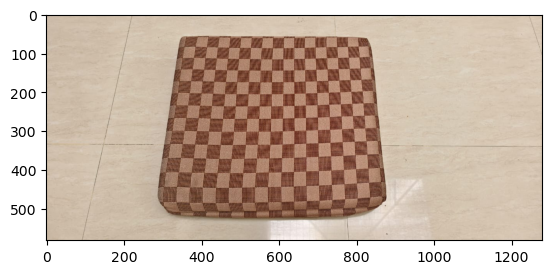

In [53]:
first_image_path = r"C:\Users\suyash\OneDrive - iiit-b\Sem7\3D Vision\Assignments\3D_Vision_Camera_Calibration_and_Homography_Estimation\Homography_Estimation\pattern_view1.jpg"
open_and_display_image(first_image_path)

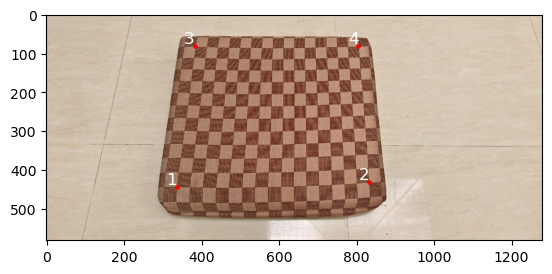

In [88]:
first_image_points = [
    (337, 445),
    (832, 432),
    (382, 80),
    (805, 80),
]

plot_points_on_image(first_image_path, first_image_points)

width: 1280 ,height: 582


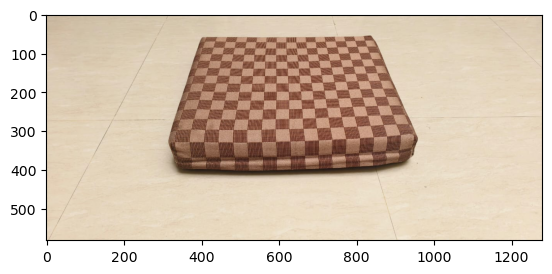

In [55]:
second_image_path = r"C:\Users\suyash\OneDrive - iiit-b\Sem7\3D Vision\Assignments\3D_Vision_Camera_Calibration_and_Homography_Estimation\Homography_Estimation\pattern_view2.jpg"
open_and_display_image(second_image_path)

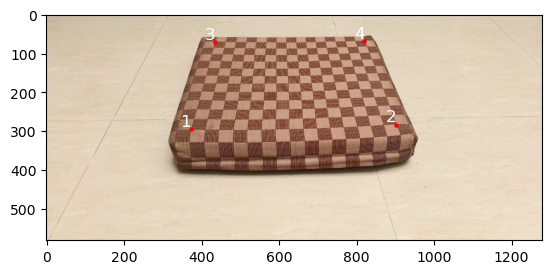

In [106]:
second_image_points = [
    (372, 295),
    (903, 283),
    (435, 70),
    (820, 68),
]

plot_points_on_image(second_image_path, second_image_points)

In [107]:
matching_points1 = get_data(first_image_points, second_image_points)

homo_est1 = HomographyEstimation(matching_points1)
homo_est1.print_homography_matrix()
homography_matrix1 = homo_est1.get_homography_matrix()

Homography matrix (Dimensions: (3, 3)):
 [[ 8.24754948e-03 -1.98700695e-03  9.55084135e-01]
 [-4.37468393e-05  4.44724123e-03  2.96031129e-01]
 [-1.24886474e-08 -3.86667477e-06  9.38694943e-03]]


### Validating Calculated Homography matrix

In [108]:
print(matching_points1)

[((337, 445), (372, 295)), ((832, 432), (903, 283)), ((382, 80), (435, 70)), ((805, 80), (820, 68))]


In [109]:
ind = 0
projected_point1 = project_point(first_image_points[ind], homography_matrix1)
print("Projected point:", projected_point1)
print("Actual point:", second_image_points[ind])

ind = 1
projected_point1 = project_point(first_image_points[ind], homography_matrix1)
print("Projected point:", projected_point1)
print("Actual point:", second_image_points[ind])

Projected point: (372.00000000001086, 295.00000000013785)
Actual point: (372, 295)
Projected point: (902.9999999999634, 283.000000000028)
Actual point: (903, 283)


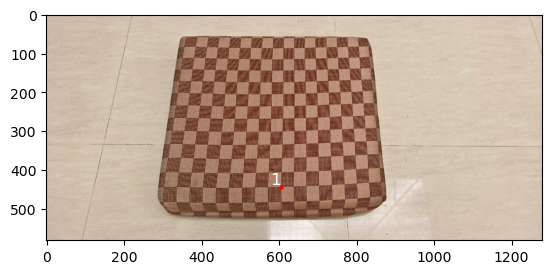

In [114]:
first_image_validation_points = [
    (605, 445)
]

plot_points_on_image(first_image_path, first_image_validation_points)

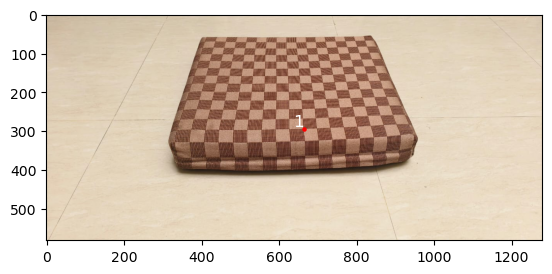

In [119]:
second_image_validation_points = [
    (665, 295)
]

plot_points_on_image(second_image_path, second_image_validation_points)

In [120]:
ind = 0
projected_point1 = project_point(first_image_validation_points[ind], homography_matrix1)
print("Projected point:", projected_point1)
print("Actual point:", second_image_validation_points[ind])

Projected point: (660.7672236548075, 293.59809530480413)
Actual point: (665, 295)


## Generating Data using Feature extraction

In [63]:
class SIFTMatcher:
    def __init__(self):
        # Initialize the SIFT detector and BFMatcher with L2 norm
        self.sift = cv2.SIFT_create()
        self.bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    def detect_and_compute(self, image):
        """Detects keypoints and computes descriptors for a given image."""
        keypoints, descriptors = self.sift.detectAndCompute(image, None)
        return keypoints, descriptors

    def match_features(self, descriptors1, descriptors2):
        """Matches descriptors between two images using BFMatcher."""
        matches = self.bf.match(descriptors1, descriptors2)
        matches = sorted(matches, key=lambda x: x.distance)  # Sort by distance for best matches
        return matches

    def get_matching_points(self, image1, image2):
        """
        Takes two images, detects keypoints and descriptors, and returns matching points.
        Returns:
            A list of tuples [(x1, y1), (x2, y2)] representing matching points between the two images.
        """
        # Step 1: Detect keypoints and compute descriptors for both images
        keypoints1, descriptors1 = self.detect_and_compute(image1)
        keypoints2, descriptors2 = self.detect_and_compute(image2)

        # Step 2: Match features between the two sets of descriptors
        matches = self.match_features(descriptors1, descriptors2)

        # Step 3: Extract the matching points
        matching_points = []
        for match in matches:
            pt1 = keypoints1[match.queryIdx].pt  # Point in image 1
            pt2 = keypoints2[match.trainIdx].pt  # Corresponding point in image 2
            matching_points.append((pt1, pt2))

        return matching_points
    
    def display_matching_points(self, image1, image2, top_k=10):
        """
        Displays the top_k matching points on each of the two images separately.
        Parameters:
            image1: The first input image.
            image2: The second input image.
            top_k: The number of top matches to display.
        """
        # Get the list of matching points using get_matching_points
        matching_points = self.get_matching_points(image1, image2)

        # Take the top_k matches
        top_matching_points = matching_points[:top_k]

        # Copy images for displaying matching points separately
        img1_with_points = image1.copy()
        img2_with_points = image2.copy()

        # Plot the matching points on each image
        for (pt1, pt2) in top_matching_points:
            pt1 = (int(pt1[0]), int(pt1[1]))
            pt2 = (int(pt2[0]), int(pt2[1]))

            # Draw circles on each matching point
            cv2.circle(img1_with_points, pt1, 5, (0, 255, 0), -1)
            cv2.circle(img2_with_points, pt2, 5, (0, 255, 0), -1)

        # Display each image with matching points in the Jupyter notebook
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(img1_with_points, cmap='gray')
        plt.title("Matching Points - Image 1")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(img2_with_points, cmap='gray')
        plt.title("Matching Points - Image 2")
        plt.axis('off')

        plt.show()

In [64]:
# Initialize the matcher
matcher = SIFTMatcher()

# Load images (convert to grayscale for SIFT)
image1_path = r'C:\Users\suyash\OneDrive - iiit-b\Sem7\3D Vision\Assignments\3D_Vision_Camera_Calibration_and_Homography_Estimation\Homography_Estimation\view2.jpg'
image2_path = r'C:\Users\suyash\OneDrive - iiit-b\Sem7\3D Vision\Assignments\3D_Vision_Camera_Calibration_and_Homography_Estimation\Homography_Estimation\view3.jpg'
image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

# Get matching points
matching_points_data = matcher.get_matching_points(image1, image2)

# Print matching points
top_k = min(100, len(matching_points_data))
matching_points_data = matching_points_data[:top_k]
print("Matching points:", matching_points_data)

Matching points: [((1103.77001953125, 924.6082153320312), (439.6544494628906, 903.5115966796875)), ((892.2322998046875, 1053.294921875), (214.04469299316406, 1032.278076171875)), ((1363.0556640625, 705.8446655273438), (703.9273071289062, 693.9102783203125)), ((1373.595458984375, 938.9265747070312), (701.6771240234375, 920.8445434570312)), ((911.3403930664062, 865.2122192382812), (245.12237548828125, 840.24169921875)), ((1216.360595703125, 543.42431640625), (571.3241577148438, 528.2152099609375)), ((1207.3011474609375, 497.1395263671875), (565.3677368164062, 481.9198303222656)), ((884.0465087890625, 802.5587768554688), (219.87538146972656, 775.4593505859375)), ((1297.87841796875, 647.0819091796875), (645.1091918945312, 633.9857788085938)), ((1235.253662109375, 670.5996704101562), (583.2296142578125, 654.8116455078125)), ((1156.54931640625, 831.5429077148438), (497.41058349609375, 811.4129028320312)), ((972.8244018554688, 826.9207763671875), (311.3317565917969, 802.3102416992188)), ((877

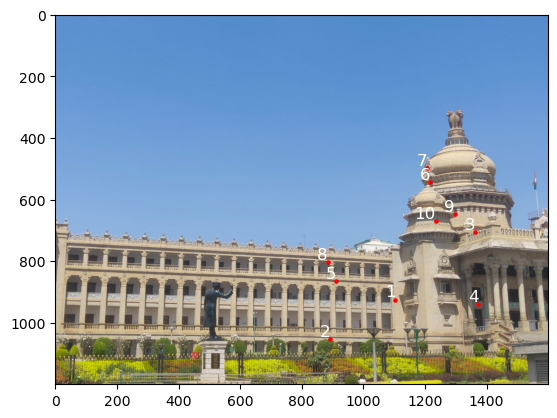

In [65]:
matching_points1 = []
matching_points2 = []

for u, v in matching_points_data[:10]:
    matching_points1.append(u)
    matching_points2.append(v)

plot_points_on_image(image1_path, matching_points1)

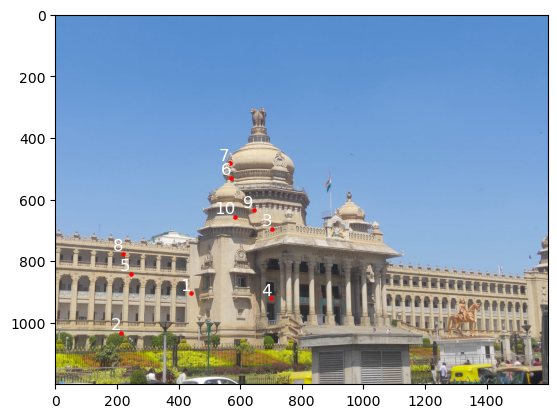

In [66]:
plot_points_on_image(image2_path, matching_points2)

In [67]:
ransac = RansacHomography(matching_points_data)
homography_matrix_ransac, _ = ransac.get_ransac_homography_matrix()
ransac.print_ransac_homography_matrix()

Homography matrix (Dimensions: (3, 3)):
 [[ 1.21528292e+00 -5.37585058e-02 -7.84098755e+02]
 [ 1.30777844e-01  1.15984796e+00 -1.74901461e+02]
 [ 1.27891453e-04  1.35358551e-05  1.00000000e+00]]


In [68]:
ransac_validation_points = [
    (1103, 924)
]
ransac_actual_points = [
    (439, 903)
]

ransac_val_index = 0
print(homography_matrix_ransac)
ransac_projected_point1 = project_point(ransac_validation_points[ransac_val_index], homography_matrix_ransac)
print("Projected point:", ransac_projected_point1)
print("Actual point:", ransac_actual_points[ransac_val_index])

[[ 1.19108749e+00 -6.54377388e-02 -7.57549033e+02]
 [ 1.28587196e-01  1.12776889e+00 -1.63222942e+02]
 [ 1.24485563e-04 -6.94687600e-06  1.00000000e+00]]
Projected point: (438.3773677229643, 902.5355219745327)
Actual point: (439, 903)


In [69]:
matching_points_data_top10 = matching_points_data[:10]

symm_trans = SymmetricTransferError(matching_points_data_top10)
symm_trans.print_homography_matrix()
homography_matrix_symm_trans = symm_trans.get_homography_matrix()

Homography matrix (Dimensions: (3, 3)):
 [[-0.28631031  2.32947008 -0.80682669]
 [ 2.21940363 -0.57294512  1.72074602]
 [ 0.39754129 -0.43265684  0.2476023 ]]


In [70]:
symm_trans_validation_points = [
    (1103, 924)
]
symm_trans_actual_points = [
    (439, 903)
]

symm_trans_val_index = 0
# print(homography_matrix_symm_trans)
symm_trans_projected_point1 = project_point(symm_trans_validation_points[symm_trans_val_index], homography_matrix_symm_trans)
print("Projected point:", symm_trans_projected_point1)
print("Actual point:", symm_trans_actual_points[symm_trans_val_index])

Projected point: (0.41157861264850026, 1.262786523756772)
Actual point: (439, 903)
